# Task 1 : Text Sentiment Analysis

# Objective
    The objective of this task is to perform sentiment analysis on a dataset of text data obtained from
    Kaggle. The goal is to analyze each text and assign a corresponding sentiment label (e.g., positive,
    negative, or neutral). This task will encompass data cleaning, preprocessing, feature engineering, model
    selection, and evaluation.


# Methodology

###  1. Data Collection
###  2. Data Cleaning and Preprocessing
###  3. Exploratory Data Analysis (EDA)
###  4. Feature Engineering
###  5. Model Selection
###  6. Model Training and Evaluation


# Data Collection:

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset:
- Positive
- Negative
- Neutral
- Irrelevant 

The Dataset is downloaded to our drive in csv format from there we will retrieve our data using pandas dataframe.

In [28]:
## Import all the necessary libraries here

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [2]:
## Retrive data here using pandas Dataframe

train_df = pd.read_csv("./twitter_dataset/twitter_training.csv" ,header = None)
test_df = pd.read_csv("./twitter_dataset/twitter_validation.csv" ,header = None)

In [3]:
## View the Train Data and test data
train_df = train_df.drop(train_df.iloc[:,0:2],axis = 1)
test_df = test_df.drop(test_df.iloc[:,0:2],axis = 1)



In [4]:
## view the data 
text_df = pd.concat((train_df ,test_df) ,axis = 0)
text_df.rename(columns = {2 : "sentiment" ,3: "text"} ,inplace = True)
text_df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


 # Data Cleaning and Preprocessing

- Check for missing value 
- Remove duplicates text
- Casing
- Remove Noise(http link ,@ ,# hashtage etc)
- 



In [5]:
## check for nan and missing values
print(text_df.isna().sum())

# drops Nan Values from DataFrame
text_df.dropna(inplace=True)

print("\n" ,"After droped ")
print(text_df.isna().sum())

sentiment      0
text         686
dtype: int64

 After droped 
sentiment    0
text         0
dtype: int64


In [9]:
## check for duplicates
print("Duplicated Rows",text_df.duplicated().sum())


## Drop duplicates values
text_df.drop_duplicates(inplace = True)

print("Duplicated Rows after",text_df.duplicated().sum())

Duplicated Rows 4744
Duplicated Rows after 0


In [18]:
#Now perform preprocessing on the text 
## this function will remove the unnecceray characters
def textProcessing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s\n]','',text)
    return text
    

In [19]:
text_df.text = text_df['text'].apply(textProcessing)

In [20]:
text_df['text']

0      im getting on borderlands and i will murder yo...
1      i am coming to the borders and i will kill you...
2      im getting on borderlands and i will kill you all
3      im coming on borderlands and i will murder you...
4      im getting on borderlands 2 and i will murder ...
                             ...                        
988     suikoden 2\n1 alex kidd in miracle world\n pe...
989    thank you to matching funds home depot rw paym...
991    late night stream with the boys come watch som...
995     toronto is the arts and culture capital of ca...
996    this is actually a good move tot bring more vi...
Name: text, Length: 70252, dtype: object

In [24]:
text_df["sentiment"].value_counts()

Negative      21329
Positive      19271
Neutral       17281
Irrelevant    12371
Name: sentiment, dtype: int64

# Exploratory Data Analysis (EDA)
- Will visualize data(unbalance data ,wordcloud etc)
- will use different graph to visualize

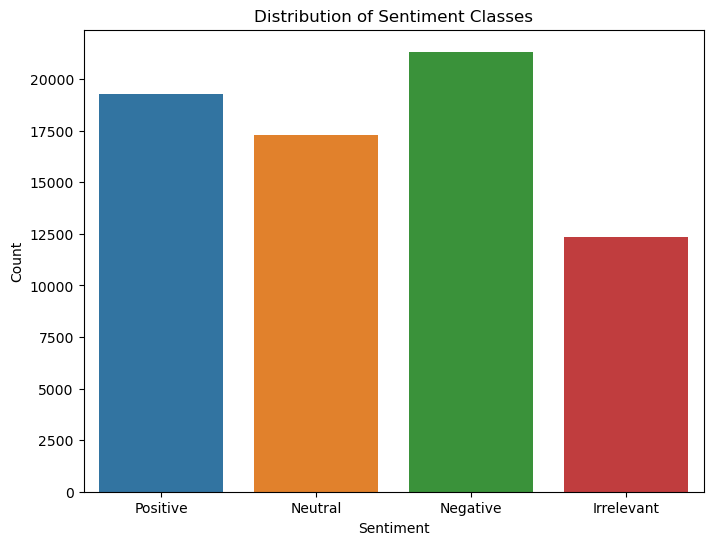

In [40]:
## Visualize the sentiment Distribution

# Visualizing the Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=text_df, x='sentiment')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## As we can view from the figure above graph that the is label is well balananced


## Now view WorkCloud for each sentiment

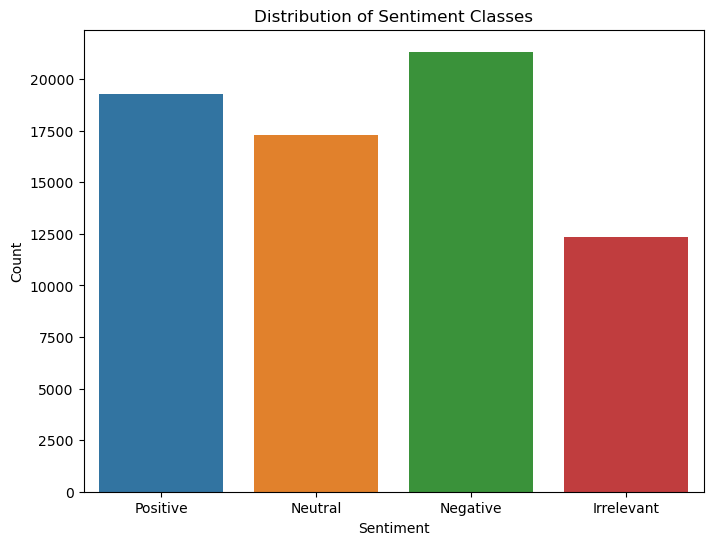

ValueError: We need at least 1 word to plot a word cloud, got 0.

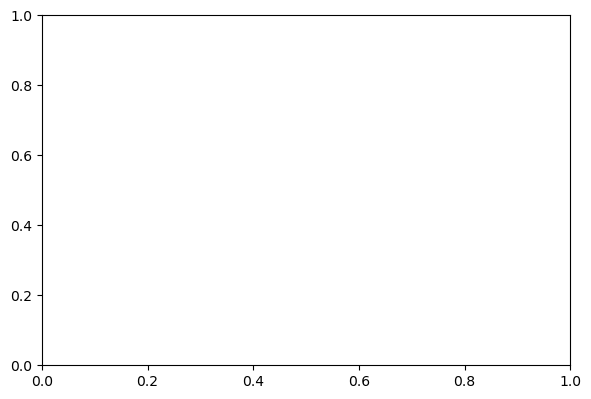

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Word Clouds for Each Sentiment
sentiments = ["Negative", "Positive", "Neutral", "Irrelevant"]

plt.figure(figsize=(15, 10))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 2, i)
    text_subset = " ".join(text_df[text_df['sentiment'] == i-1]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiments')
    plt.axis('off')

plt.tight_layout()
plt.show()

